In [ ]:
install.packages("ggpmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘ggpp’, ‘confintr’, ‘lmodel2’, ‘splus2R’, ‘multcomp’, ‘multcompView’, ‘plyr’




In [ ]:
library(tidyverse)
library(RColorBrewer)
library(ggplot2)
library(gridExtra)
library(knitr)
library(kableExtra)
library(psych)
library(car)
library(dplyr)
library(countrycode)
library(ggpubr)
library(ggpmisc)

Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: ‘ggpp’


The following object is masked from ‘package:ggplot2’:

    annotate


Registered S3 method overwritten by 'ggpmisc':
  method                  from   
  as.character.polynomial polynom



In [ ]:
options(scipen = 999)
suicide_rate <- read.csv("suicide_rate.csv")
head(suicide_rate)

,country,year,sex,age,suicides_no,population,suicides.100k.pop,country.year,HDI.for.year,gdp_for_year....,gdp_per_capita....,generation
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,"2,156,624,900",796,Generation X
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,"2,156,624,900",796,Silent
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,"2,156,624,900",796,Generation X
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,"2,156,624,900",796,G.I. Generation
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,"2,156,624,900",796,Boomers
6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,"2,156,624,900",796,G.I. Generation


In [ ]:
summary(suicide_rate)

   country               year          sex                age           
 Length:27820       Min.   :1985   Length:27820       Length:27820      
 Class :character   1st Qu.:1995   Class :character   Class :character  
 Mode  :character   Median :2002   Mode  :character   Mode  :character  
                    Mean   :2001                                        
                    3rd Qu.:2008                                        
                    Max.   :2016                                        
                                                                        
  suicides_no        population       suicides.100k.pop country.year      
 Min.   :    0.0   Min.   :     278   Min.   :  0.00    Length:27820      
 1st Qu.:    3.0   1st Qu.:   97498   1st Qu.:  0.92    Class :character  
 Median :   25.0   Median :  430150   Median :  5.99    Mode  :character  
 Mean   :  242.6   Mean   : 1844794   Mean   : 12.82                      
 3rd Qu.:  131.0   3rd Qu.: 1486143   3rd

In [ ]:
glimpse(suicide_rate)

Rows: 27,820
Columns: 12
$ country            <chr> "Albania", "Albania", "Albania", "Albania", "Albani…
$ year               <int> 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 198…
$ sex                <chr> "male", "male", "female", "male", "male", "female",…
$ age                <chr> "15-24 years", "35-54 years", "15-24 years", "75+ y…
$ suicides_no        <int> 21, 16, 14, 1, 9, 1, 6, 4, 1, 0, 0, 0, 2, 17, 1, 14…
$ population         <int> 312900, 308000, 289700, 21800, 274300, 35600, 27880…
$ suicides.100k.pop  <dbl> 6.71, 5.19, 4.83, 4.59, 3.28, 2.81, 2.15, 1.56, 0.7…
$ country.year       <chr> "Albania1987", "Albania1987", "Albania1987", "Alban…
$ HDI.for.year       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ gdp_for_year....   <chr> "2,156,624,900", "2,156,624,900", "2,156,624,900", …
$ gdp_per_capita.... <int> 796, 796, 796, 796, 796, 796, 796, 796, 796, 796, 7…
$ generation         <chr> "Generation X", "Silent", "Generation X", "G.I. Gen…


In [ ]:
# To check if any null value is present

sum(is.na(suicide_rate))

table(suicide_rate$age, suicide_rate$generation)

[1] 19456

             
              Boomers G.I. Generation Generation X Generation Z Millenials
  15-24 years       0               0         2114            0       2528
  25-34 years    1154               0         2682            0        806
  35-54 years    3030               0          982            0          0
  5-14 years        0               0          630         1470       2510
  55-74 years     806             630            0            0          0
  75+ years         0            2114            0            0          0
             
              Silent
  15-24 years      0
  25-34 years      0
  35-54 years    630
  5-14 years       0
  55-74 years   3206
  75+ years     2528

In [ ]:
# Dropping null rows for HDI.for.year as it contains lots of null values
suicide_rate1 <- suicide_rate[is.na(suicide_rate$HDI.for.year) == FALSE,]

In [ ]:
# Renaming columns
suicide_rate1 <- suicide_rate1 %>%
  rename(gdp_for_year_100M = gdp_for_year....,
         gdp_per_capita = gdp_per_capita....,
         country_year = country.year,
         country = names(suicide_rate[1]))

In [ ]:
# Fixing variables
suicide_rate1$age<- gsub(" years", "", suicide_rate1$age)
suicide_rate1$gdp_for_year_100M <- gsub(",", "", suicide_rate1$gdp_for_year_100M)
suicide_rate1$gdp_for_year_100M <- as.numeric(suicide_rate1$gdp_for_year_100M)
suicide_rate1$sex <- ifelse(suicide_rate1$sex == "male", "Male", "Female")


In [ ]:
# Converting GDP for Year in 100 Millions
suicide_rate1$gdp_for_year_100M <- suicide_rate1$gdp_for_year_100M/100000000

In [ ]:
# Adding the continent to the dataset based on the countries
suicide_rate1$continent <- countrycode(sourcevar = suicide_rate1[,"country"],
                                       origin = "country.name",
                                       destination = "continent")


In [ ]:
# Adding year group variable
suicide_rate1$year_group <- ifelse(suicide_rate1$year < 1990, "Before 1990",
                                   ifelse(suicide_rate1$year >= 1990 & suicide_rate1$year < 2000, "1990 - 1999",
                                          ifelse(suicide_rate1$year >= 2000 & suicide_rate1$year < 2010, "2000 - 2009","2010 onwards")))



In [ ]:
# Factors:

# Nominal

lst <- c("country","sex")
suicide_rate1[lst] <- lapply(suicide_rate1[lst], as.factor)

suicide_rate1$continent <- as.factor(suicide_rate1$continent)

In [ ]:
# Ordinal
#unique(suicide_rate1$age)
suicide_rate1$age <- factor(suicide_rate1$age, ordered = T,
                            levels = c("5-14","15-24","25-34","35-54","55-74","75+"))


In [ ]:
suicide_rate1$generation <- factor(suicide_rate1$generation, ordered = T,
                                   levels = c("G.I. Generation","Silent","Boomers","Generation X","Millenials","Generation Z"))

suicide_rate1$year_group <- factor(suicide_rate1$year_group, ordered = T,
                                   levels = c("Before 1990","1990 - 1999","2000 - 2009", "2010 onwards"))



In [ ]:
# dropping the column country_year as it is redundant
suicide_rate2 <- subset(suicide_rate1, select = -c(country_year))

In [ ]:
num_list <- c("suicides_no","population", "suicides.100k.pop","HDI.for.year","gdp_for_year_100M","gdp_per_capita")

# Descriptive statistics fo the dataset (numerical values)
tbl_desc <- as.data.frame(describe(suicide_rate2[num_list]))

kable(round(tbl_desc,2), caption = "<center> Descriptive Statistics of Numerical variables") %>%
  kable_classic()


<table class=" lightable-classic" style='font-family: "Arial Narrow", "Source Sans Pro", sans-serif; margin-left: auto; margin-right: auto;'>
<caption><center> Descriptive Statistics of Numerical variables</center></caption>
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> vars </th>
   <th style="text-align:right;"> n </th>
   <th style="text-align:right;"> mean </th>
   <th style="text-align:right;"> sd </th>
   <th style="text-align:right;"> median </th>
   <th style="text-align:right;"> trimmed </th>
   <th style="text-align:right;"> mad </th>
   <th style="text-align:right;"> min </th>
   <th style="text-align:right;"> max </th>
   <th style="text-align:right;"> range </th>
   <th style="text-align:right;"> skew </th>
   <th style="text-align:right;"> kurtosis </th>
   <th style="text-align:right;"> se </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> suicides_no </td>
   <td style="text-align:right;"> 1 </td>
   <td 

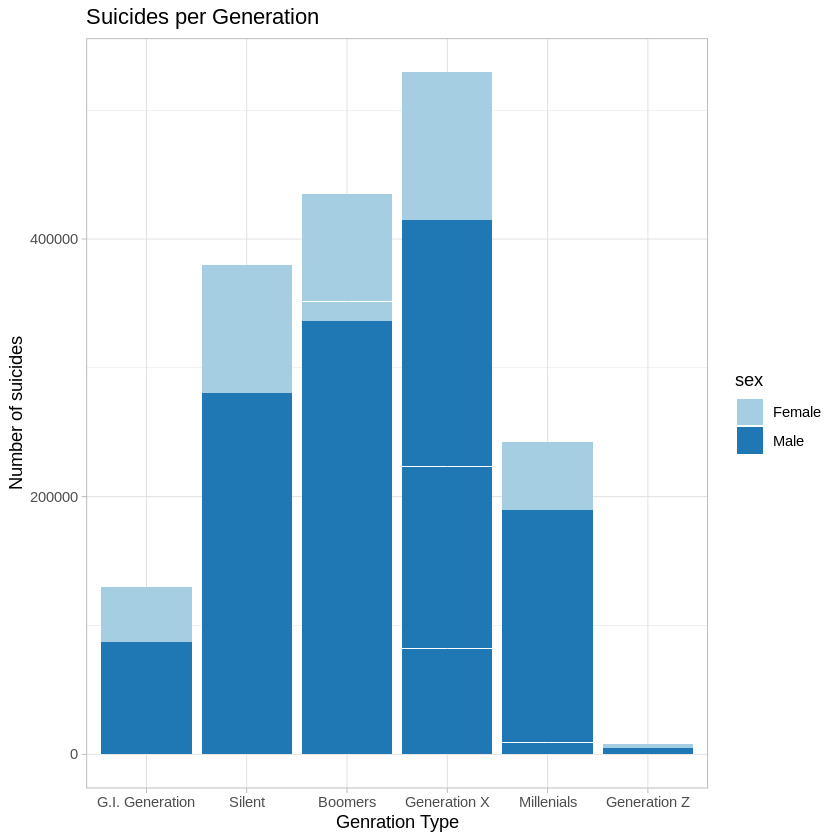

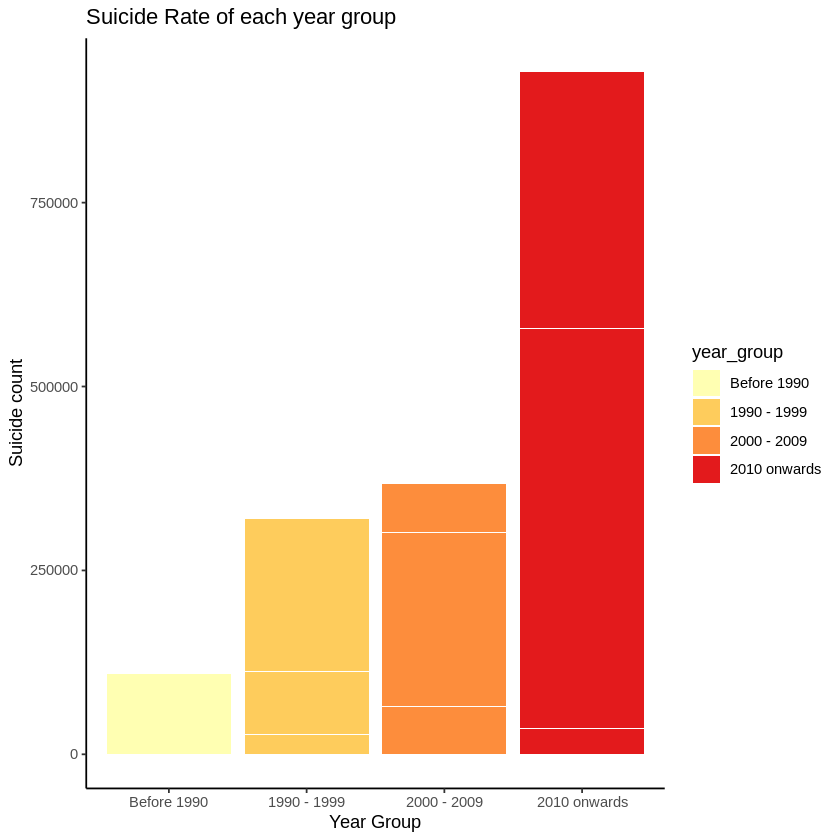

In [ ]:
# Suicide number of each generation

plt1 <- ggplot(suicide_rate2, mapping = aes(x=generation, y=suicides_no, fill = sex))+
  geom_bar(stat = "identity")+
  scale_fill_brewer(palette = "Paired")+
  labs(title = "Suicides per Generation", x= "Genration Type", y = "Number of suicides")+
  theme_light()
plt1


plt2 <- ggplot(data = suicide_rate2, mapping = aes(x = reorder(year_group, -suicides_no), y = suicides_no, fill = year_group)) +  geom_bar(stat = "identity") +
  scale_fill_brewer(palette="YlOrRd") +
  labs(title="Suicide Rate of each year group",x="Year Group", y = "Suicide count") +
  theme_classic()

plt2



G.I. Generation          Silent         Boomers    Generation X      Millenials 
      206.90575       221.56068       354.87847       262.84558       121.51605 
   Generation Z 
       10.11519

null device 
          1

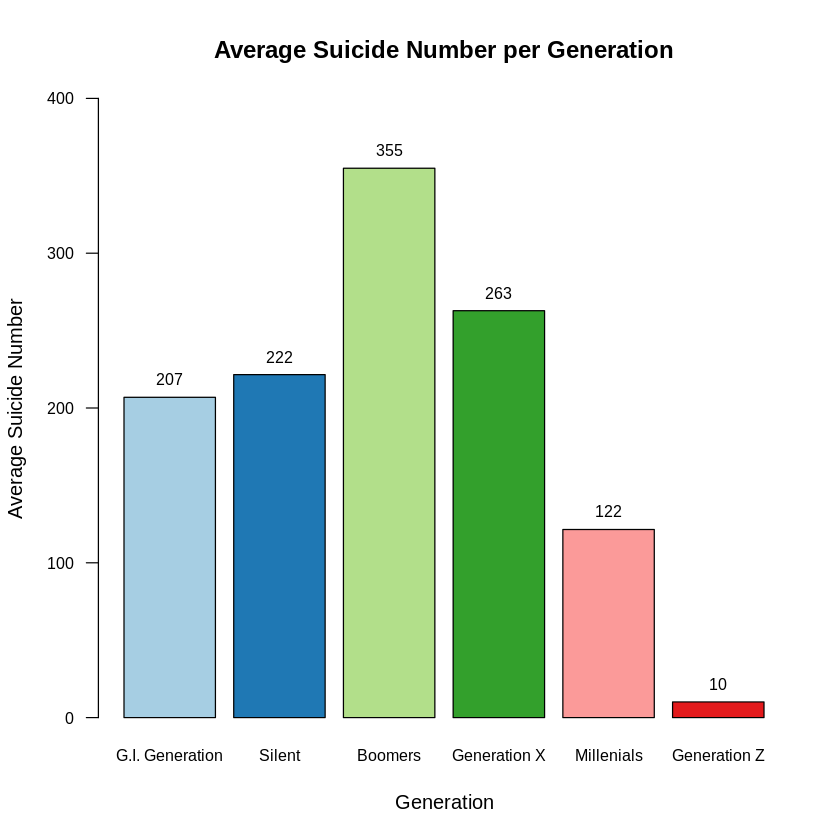

In [ ]:
#Average Suicide Number per Generation
par(mfcol = c(1,1))

sumgen <- tapply(suicide_rate2$suicides_no, INDEX = list(suicide_rate2$generation), mean, na.rm=TRUE)
sumgen
x <- barplot(sumgen,
        col = brewer.pal(6, "Paired"),
        ylim = c(0, 400),
        xlab = "Generation",
        ylab = "Average Suicide Number",
        las = 1,
        cex.axis = 0.8,
        cex.names = 0.8,
        main = "Average Suicide Number per Generation")
text(y = sumgen,
     x,
     round(sumgen,0),
     cex = 0.8,
     pos = 3)


meansr <- tapply(suicide_rate2$suicides.100k.pop, INDEX = list(suicide_rate2$sex, suicide_rate2$year), mean, na.rm=TRUE)

dev.off()
matplot(colnames(meansr), t(meansr), xlab="Year", las =1,
        ylab="Average Suicide per 100K Population", type="b", lty=1, pch=19,
        main = "Graph: Suicide Rate Rate of Different Gender from 1985 to 2015")
nn <- nrow(meansr)
legend("left", rownames(meansr),col=seq_len(nn),cex=0.8,fill=seq_len(nn))


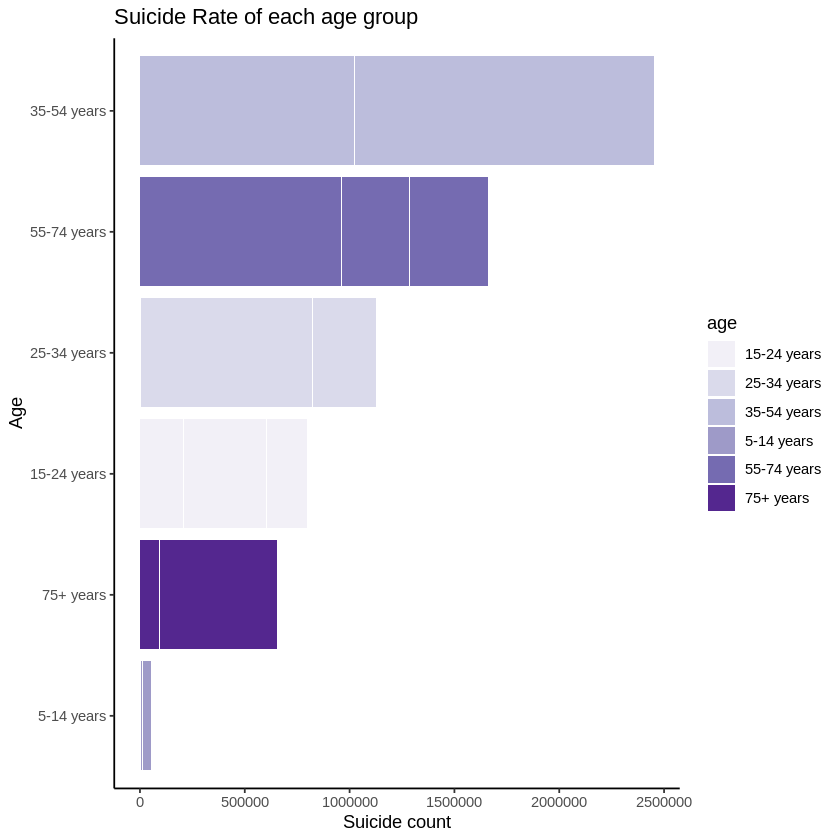

In [ ]:
#Suicide Rate of each age group
ggplot(data = suicide_rate, mapping = aes(x = reorder(age, suicides_no), y = suicides_no, fill = age)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette="blues") + coord_flip() +
  labs(title="Suicide Rate of each age group",x="Age", y = "Suicide count") +
  theme_classic()

[1] 4093 3913


	One Sample t-test

data:  year$suicides.100k.pop
t = -5.723, df = 4739, p-value = 1
alternative hypothesis: true mean is greater than 11.99
95 percent confidence interval:
 10.35715      Inf
sample estimates:
mean of x 
 10.72174 


Warning message:
“Removed 160 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 160 rows containing non-finite values (`stat_central_tendency()`).”


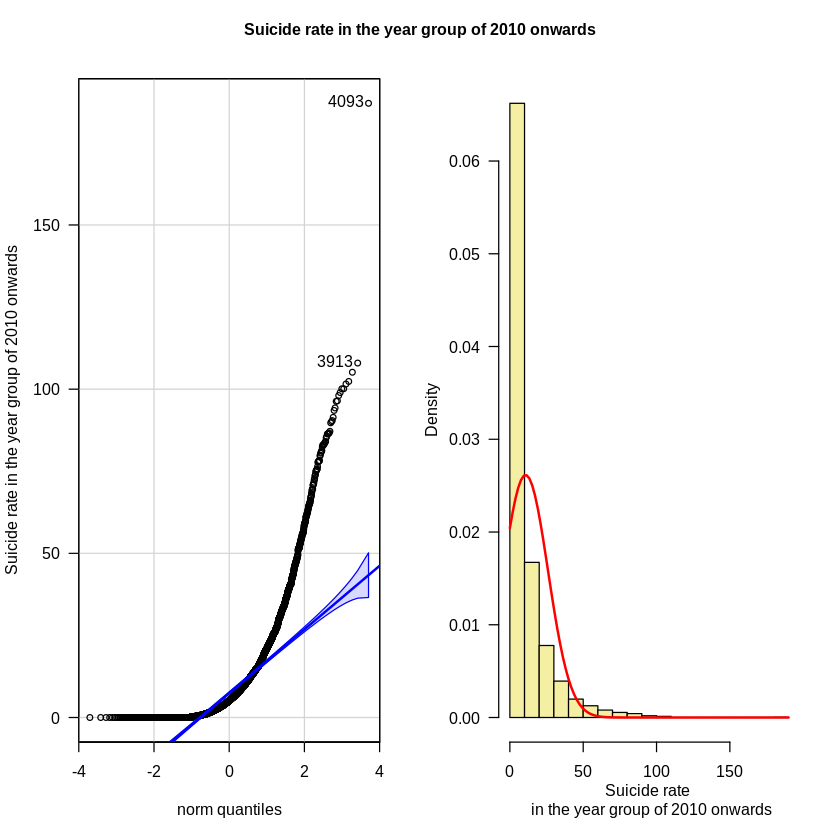

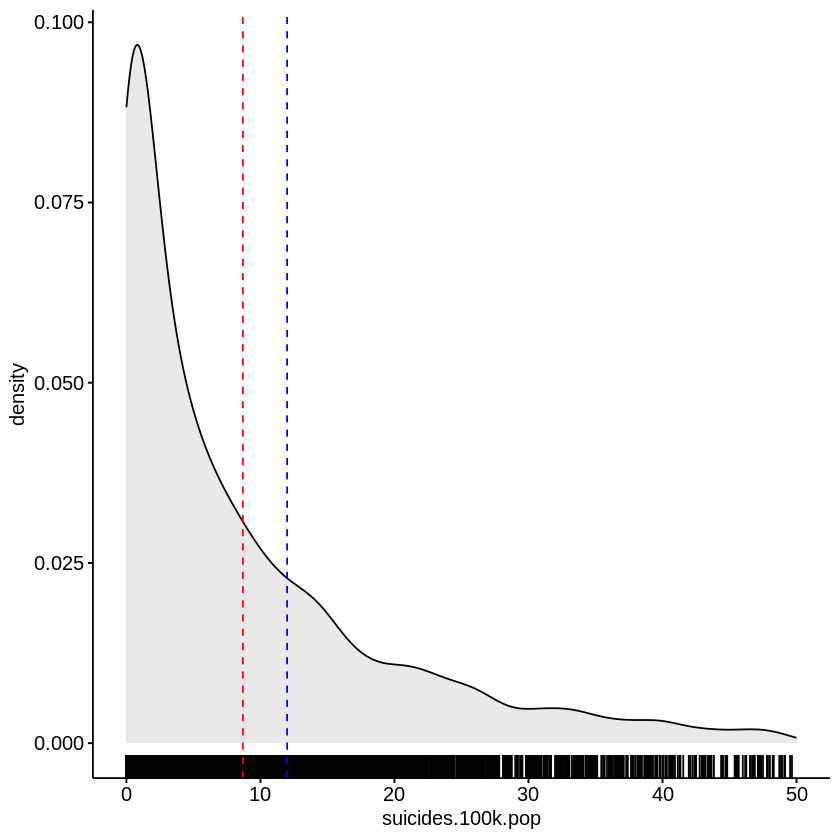

In [ ]:
# Question 1: Is the average suicide rate in the year group 2010 onwards higher than the population mean?

#H0 = The average suicide rate in the year group 2010 onwards has the same average suicide rate of the whole population.
#H1 = The average suicide rate in the year group 2010 onwards is higher than the average suicide rate of the whole population. (Claim)

year<-subset(suicide_rate2, subset = (suicide_rate2$year_group == "2010 onwards"))

#Distribution of 2010 onwards suicide rate
par(mfrow= c(1,2), cex= 0.8, mgp = c(3,1,0))
qqPlot(year$suicides.100k.pop, ylab = "Suicide rate in the year group of 2010 onwards", las = 1)
hist(year$suicides.100k.pop, freq = FALSE, las = 1, col = "#F5EFA4", xlab = "Suicide rate \n in the year group of 2010 onwards", main = "")
curve(dnorm(x, mean= mean(year$suicides.100k.pop), sd = sd(year$suicides.100k.pop)), col = "red", lwd =2, add = TRUE)
mtext("Suicide rate in the year group of 2010 onwards", side = 3, line = -2, outer = TRUE, cex = 0.8, font = 2)

#One sample T-test
ttest1 <-t.test(year$suicides.100k.pop, mu = 11.99, alternative = "greater", conf.level = 0.95)
ttest1
ggdensity(year, x= "suicides.100k.pop", rug = TRUE, fill = "lightgray") +
  scale_x_continuous(limits = c(0,50)) +
  stat_central_tendency(type = "mean", color = "red", linetype = "dashed") +
  geom_vline(xintercept = 11.99, color = "blue", linetype ="dashed")



Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'country', 'year'. You can override using
the `.groups` argument.


[1] 0.2664062

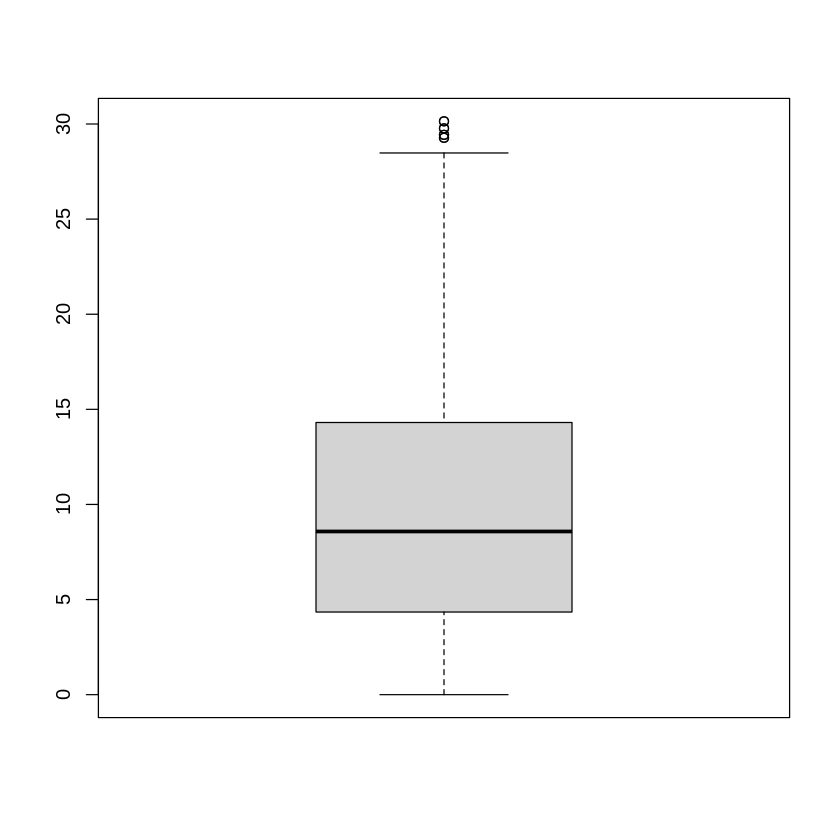

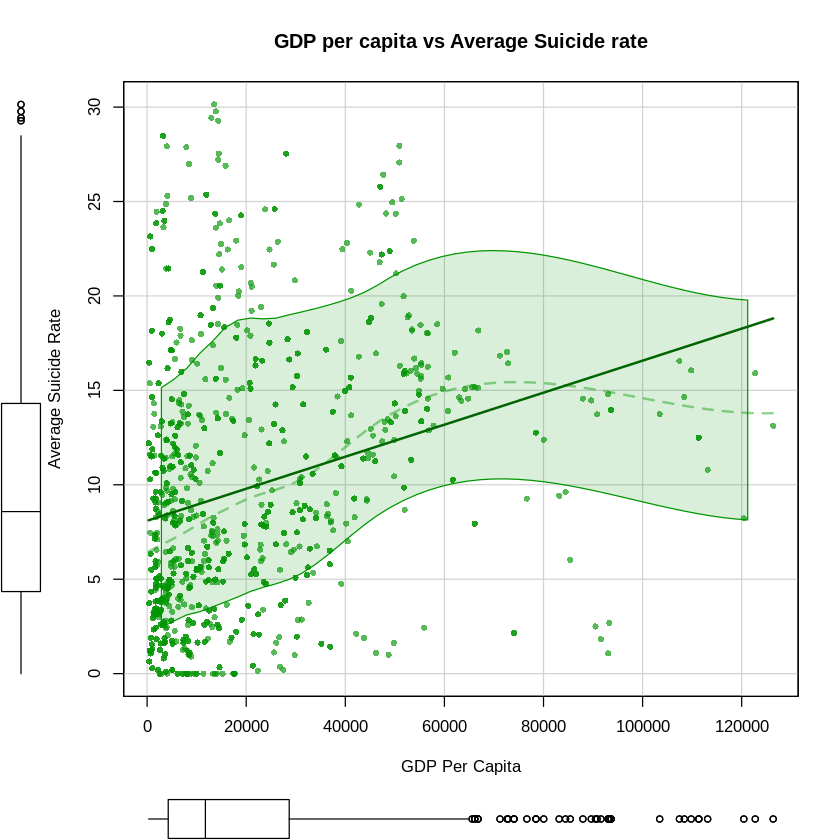

In [ ]:
#------------------------------ Correlation and Regression Analysis-----------------------------------------------------

# Preparing data for analyzing Generation X and Millenials

df_gen <- suicide_rate2 %>% group_by(country, year) %>% filter(generation == "Generation X") %>%
  summarise(
    avg_suicide_no = mean(suicides_no),
    avg_suicide_rate = mean(suicides.100k.pop),
    hdi = HDI.for.year,
    gdp_per_capita
  )

# getting minimum outlier
min_out <- min(boxplot.stats(df_gen$avg_suicide_rate)$out)

# removing outliers
df_gen <- df_gen[df_gen$avg_suicide_rate<min_out, ]

# investigatory boxplot
boxplot( df_gen$avg_suicide_rate)

# Getting correlation value
cor(df_gen$gdp_per_capita,df_gen$avg_suicide_rate)

# scatterplot for correlation for Generation X
scatterplot(df_gen$gdp_per_capita,df_gen$avg_suicide_rate,
            regLine=list(method=lm, lty=1, lwd=2, col="darkgreen"),
            legend = c(title="cyl", coords="topright"),
            main = "GDP per capita vs Average Suicide rate",
            ylab= "Average Suicide Rate",
            xlab = "GDP Per Capita",
            col=rgb(0,70,0,50,maxColorValue=120), pch=16, frame = TRUE, smooth = TRUE)


Call:
lm(formula = df_gen$avg_suicide_rate ~ df_gen$gdp_per_capita)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.917  -4.790  -1.300   3.818  20.898 

Coefficients:
                         Estimate  Std. Error t value            Pr(>|t|)    
(Intercept)           8.095320538 0.204122623   39.66 <0.0000000000000002 ***
df_gen$gdp_per_capita 0.000084797 0.000007002   12.11 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.574 on 1920 degrees of freedom
Multiple R-squared:  0.07097,	Adjusted R-squared:  0.07049 
F-statistic: 146.7 on 1 and 1920 DF,  p-value: < 0.00000000000000022


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'country', 'year'. You can override using
the `.groups` argument.


[1] 0.1879212

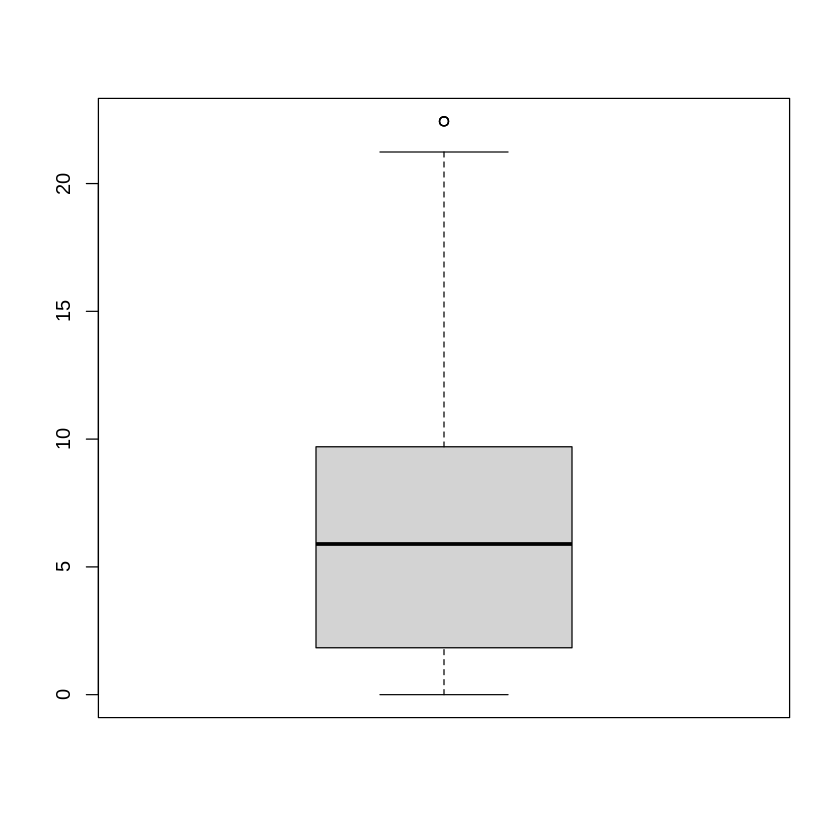

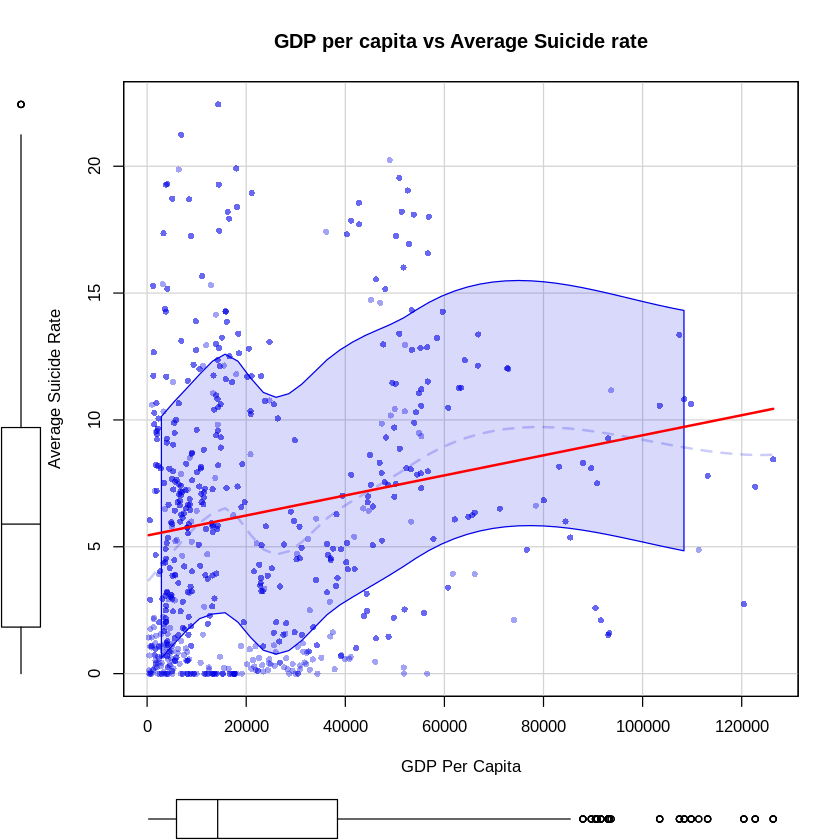

In [ ]:
# Regression analysis
lmgen <- lm(df_gen$avg_suicide_rate~df_gen$gdp_per_capita)
summary(lmgen)

#preparing data for GDP per Capita vs Average Suicide rate for Millenials
df_mil <- suicide_rate2 %>% group_by(country, year) %>% filter(generation == "Millenials") %>%
  summarise(
    avg_suicide_no = mean(suicides_no),
    avg_suicide_rate = mean(suicides.100k.pop),
    hdi = HDI.for.year,
    gdp_per_capita
  )

# getting outliers
min_out_mil <- min(boxplot.stats(df_mil$avg_suicide_rate)$out)

# filtering outliers
df_mil <- df_mil[df_mil$avg_suicide_rate<min_out_mil, ]
# investigatory boxplot
boxplot( df_mil$avg_suicide_rate)

# Getting correlation value
cor(df_mil$gdp_per_capita,df_mil$avg_suicide_rate)

# Plotting correlation and regression for Millenials
scatterplot(df_mil$gdp_per_capita,df_mil$avg_suicide_rate,
            regLine=list(method=lm, lty=1, lwd=2, col="red"),
            legend = c(title="cyl", coords="topright"),
            main = "GDP per capita vs Average Suicide rate",
            ylab= "Average Suicide Rate",
            xlab = "GDP Per Capita",
            col=rgb(0,0,90,20,maxColorValue=100), pch=16, frame = TRUE)

In [ ]:
# Regression Analysis
lmmil <- lm(df_mil$avg_suicide_rate~df_mil$gdp_per_capita)
summary(lmmil)


#Correlation Table

cor <- cor(suicide_rate2[,c(5,6,7,8,9,10)])

round(cor, 3) %>%
  kbl(caption = "Corraltion Table: Numerial Variables") %>%
  kable_classic(full_width = F, html_font = "Cambria")



Call:
lm(formula = df_mil$avg_suicide_rate ~ df_mil$gdp_per_capita)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6772 -4.3940 -0.6746  3.3301 16.4238 

Coefficients:
                         Estimate  Std. Error t value            Pr(>|t|)    
(Intercept)           5.444009200 0.162621039  33.477 <0.0000000000000002 ***
df_mil$gdp_per_capita 0.000039526 0.000004705   8.401 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.064 on 1928 degrees of freedom
Multiple R-squared:  0.03531,	Adjusted R-squared:  0.03481 
F-statistic: 70.58 on 1 and 1928 DF,  p-value: < 0.00000000000000022


<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Corraltion Table: Numerial Variables</caption>
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> suicides_no </th>
   <th style="text-align:right;"> population </th>
   <th style="text-align:right;"> suicides.100k.pop </th>
   <th style="text-align:right;"> HDI.for.year </th>
   <th style="text-align:right;"> gdp_for_year_100M </th>
   <th style="text-align:right;"> gdp_per_capita </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> suicides_no </td>
   <td style="text-align:right;"> 1.000 </td>
   <td style="text-align:right;"> 0.699 </td>
   <td style="text-align:right;"> 0.237 </td>
   <td style="text-align:right;"> 0.151 </td>
   <td style="text-align:right;"> 0.607 </td>
   <td style="text-align:right;"> 0.105 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> population </td>
   <td 

[1] 361 362

[1] 3253 3254

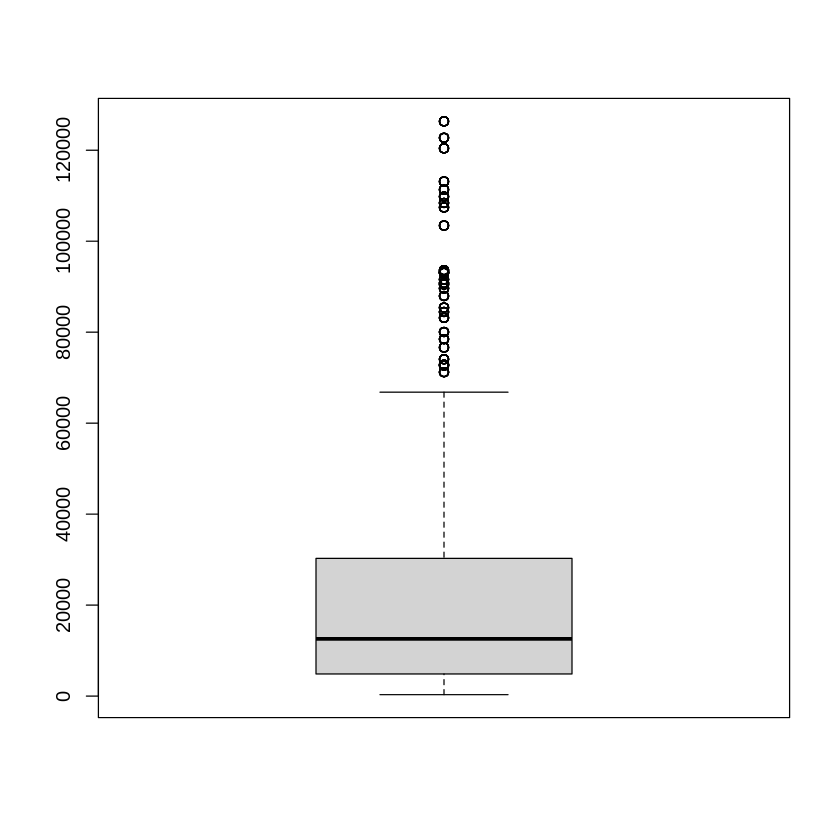

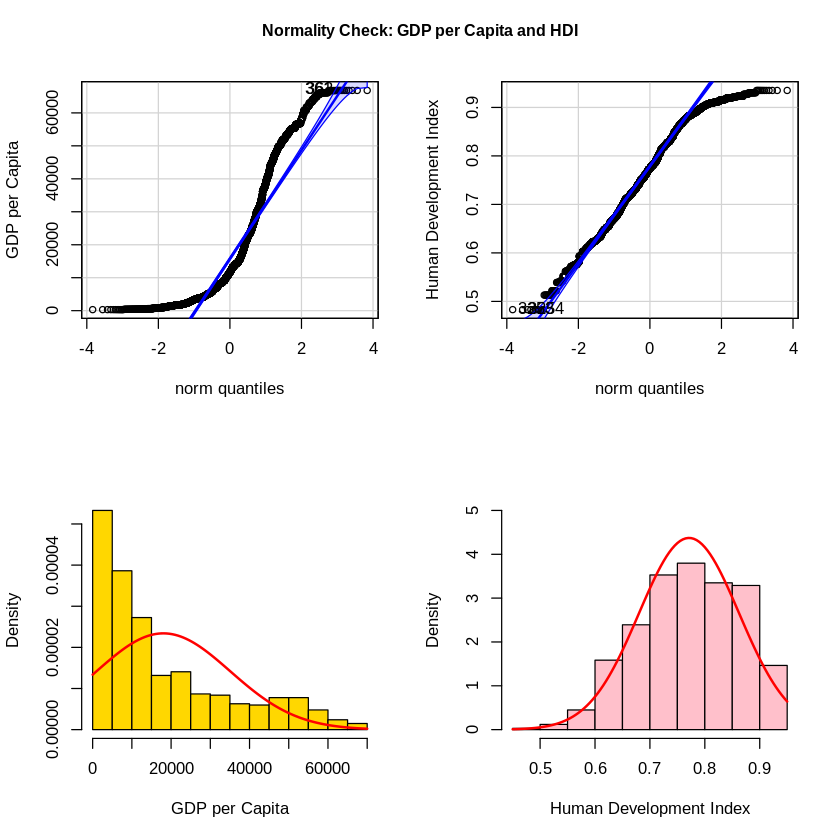

In [ ]:
#Regression
#GDP vs HDI

# getting GDP Per Capita outlier
gdp_out <- min(boxplot.stats(suicide_rate2$gdp_per_capita)$out)
boxplot(suicide_rate2$gdp_per_capita)


# removing outlier
gdp <- suicide_rate2[suicide_rate2$gdp_per_capita < gdp_out,]

#getting HDI outliers
hdi_out <- boxplot.stats(gdp$HDI.for.year)$out

# removing outlier
gdphdi <- gdp[gdp$HDI.for.year > hdi_out,]

#Normality Check
par(mfcol = c(2, 2))
qqPlot(gdphdi$gdp_per_capita, ylab = "GDP per Capita")
hist(gdphdi$gdp_per_capita, freq = F, main = "", col = "gold", xlab = "GDP per Capita")
curve(dnorm(x, mean= mean(gdp$gdp_per_capita), sd = sd(gdp$gdp_per_capita)), col = "red", lwd =2, add = TRUE)
qqPlot(gdp$HDI.for.year, ylab = "Human Development Index")
hist(gdp$HDI.for.year, freq = F, main = "", col = "pink", xlab = "Human Development Index", ylim = c(0,5))
curve(dnorm(x, mean = mean(gdp$HDI.for.year), sd = sd(gdp$HDI.for.year)), col="red", lwd =2, add = TRUE)
mtext("Normality Check: GDP per Capita and HDI", side = 3, line = -2, outer = TRUE, cex = 0.8, font = 2)

[1] 0.8315324


	Pearson's product-moment correlation

data:  gdp$HDI.for.year and gdp$gdp_per_capita
t = 133.01, df = 8026, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8224533 0.8361118
sample estimates:
      cor 
0.8294064 



Call:
lm(formula = gdphdi$HDI.for.year ~ gdphdi$gdp_per_capita)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.186338 -0.031252  0.005145  0.036001  0.117052 

Coefficients:
                         Estimate  Std. Error t value            Pr(>|t|)    
(Intercept)           0.691838506 0.000819215   844.5 <0.0000000000000002 ***
gdphdi$gdp_per_capita 0.000004422 0.000000033   134.0 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05034 on 8014 degrees of freedom
Multiple R-squared:  0.6914,	Adjusted R-squared:  0.6914 
F-statistic: 1.796e+04 on 1 and 8014 DF,  p-value: < 0.00000000000000022


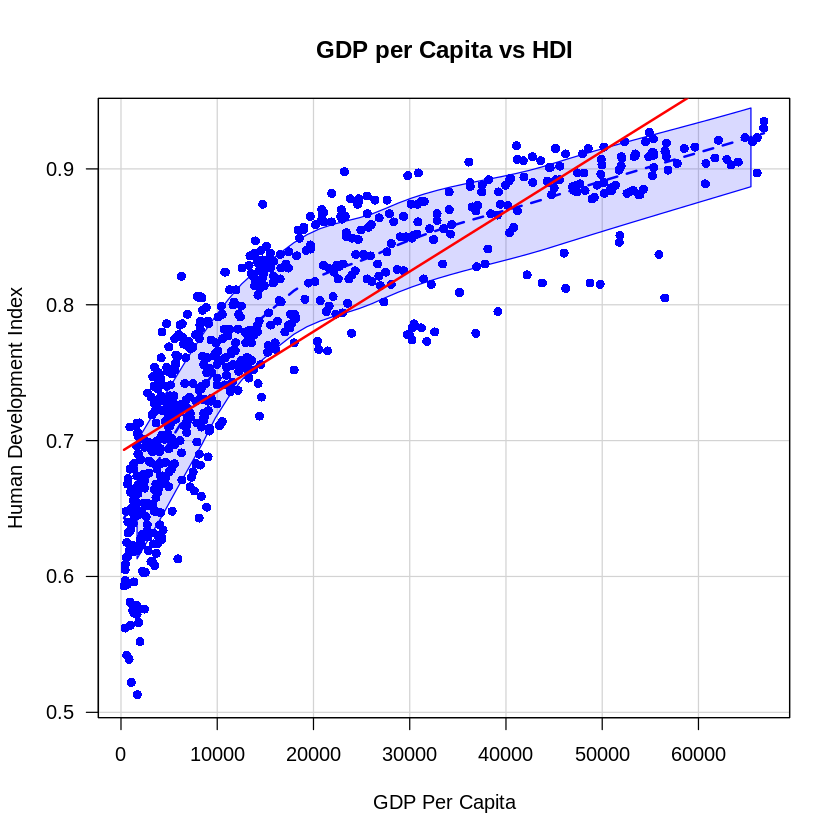

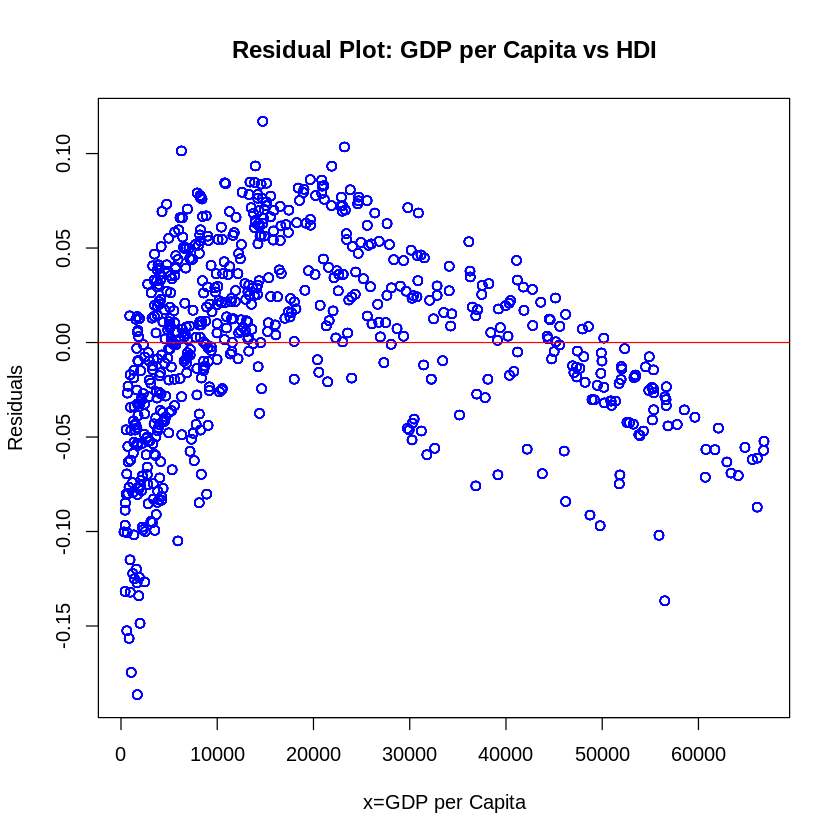

In [ ]:
#correlation
cor(gdphdi$gdp_per_capita , gdphdi$HDI.for.year)

#scattetplot GDP vs HDI
scatterplot(gdphdi$gdp_per_capita , gdphdi$HDI.for.year, xlab = "GDP Per Capita", ylab = "Human Development Index", las = 1, main = "GDP per Capita vs HDI", boxplots = FALSE, regLine=list(method=lm, lty=1, lwd=2, col="red"), pch=16, frame = TRUE)

cor.test(gdp$HDI.for.year , gdp$gdp_per_capita)

#Regression Analysis: GDP HDI
GHlm <- lm(gdphdi$HDI.for.year ~ gdphdi$gdp_per_capita)
summary(GHlm)

#Residual Check
par(mfcol = c(1, 1))
plot(gdphdi$gdp_per_capita, GHlm$residuals,pch=21,col="blue",
     xlab="x=GDP per Capita",
     ylab="Residuals",
     main="Residual Plot: GDP per Capita vs HDI")
abline(h=0, col ="red")

[1] 0.3357195

[1] 489 394

[1] 827 829

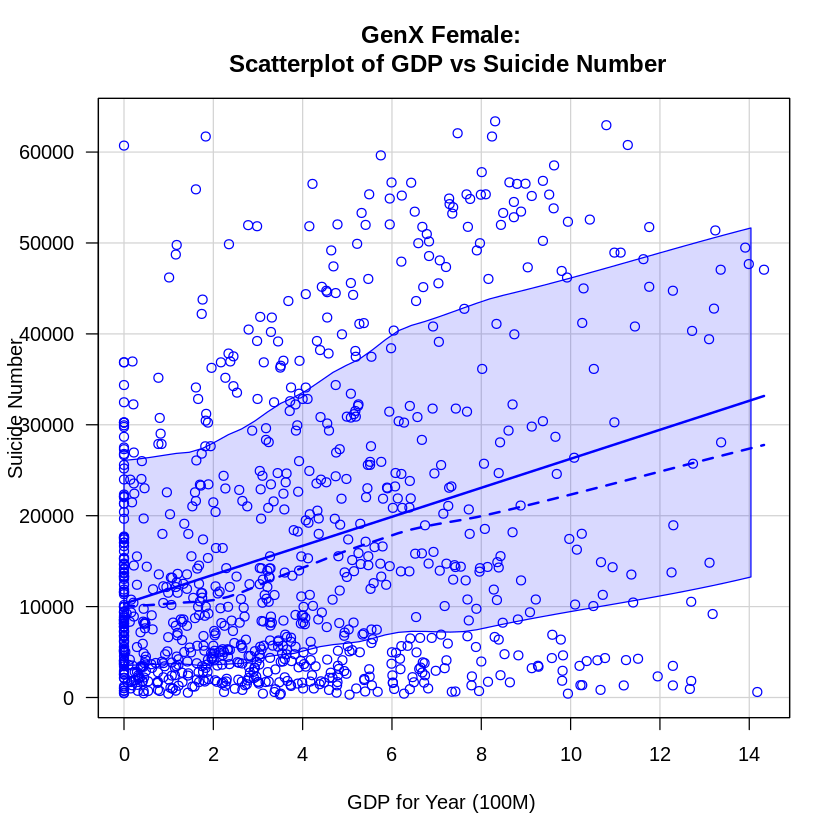


Call:
lm(formula = fgenx_suigdp$suicides.100k.pop ~ fgenx_suigdp$gdp_per_capita)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0202 -2.5369 -0.5113  1.7902 11.4070 

Coefficients:
                               Estimate  Std. Error t value            Pr(>|t|)
(Intercept)                 2.730091122 0.147891757   18.46 <0.0000000000000002
fgenx_suigdp$gdp_per_capita 0.000070663 0.000006474   10.92 <0.0000000000000002
                               
(Intercept)                 ***
fgenx_suigdp$gdp_per_capita ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.13 on 938 degrees of freedom
Multiple R-squared:  0.1127,	Adjusted R-squared:  0.1118 
F-statistic: 119.1 on 1 and 938 DF,  p-value: < 0.00000000000000022


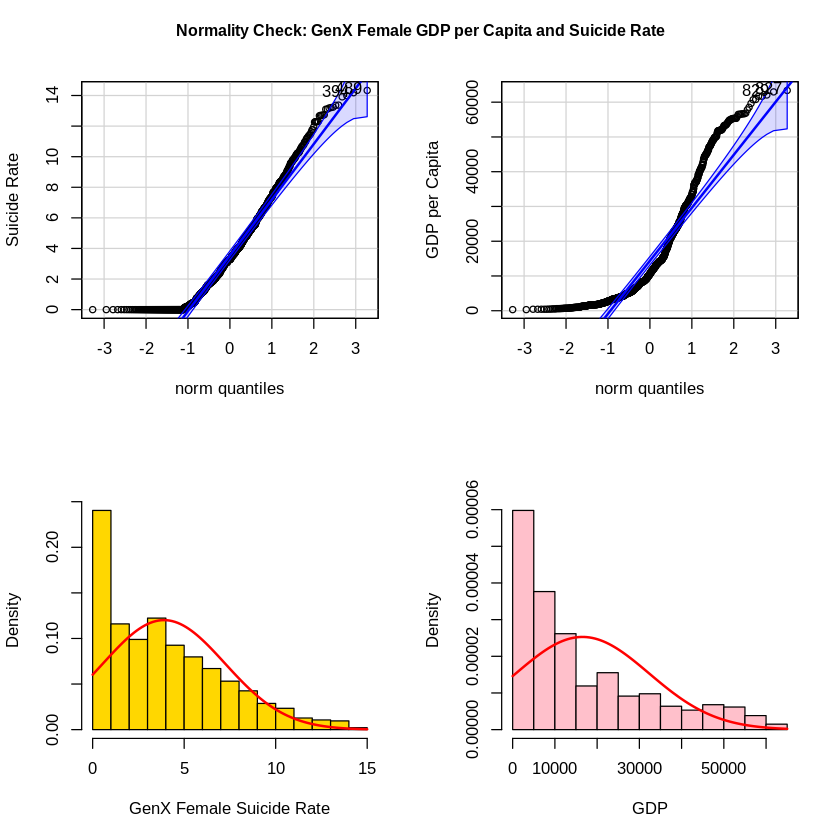

In [ ]:
#GenX Female: GDP per Capita vs Suicide rate

#removing outliers
fsui_out <- min(boxplot.stats(fgenx$suicides.100k.pop)$out)
fgenx_sui <- fgenx[fgenx$suicides.100k.pop <fsui_out, ]
fgdp_out <- min(boxplot.stats(fgenx_sui$gdp_per_capita)$out)
fgenx_suigdp <- fgenx_sui[fgenx_sui$gdp_per_capita < fgdp_out, ]


#Correlation
cor(fgenx_suigdp$suicides.100k.pop , fgenx_suigdp$gdp_per_capita)

#scatterplot
scatterplot(fgenx_suigdp$suicides.100k.pop, fgenx_suigdp$gdp_per_capita, xlab = "GDP for Year (100M) ", ylab = "Suicide Number", las = 1, main = "GenX Female: \n Scatterplot of GDP vs Suicide Number", las =1, boxplots = FALSE)


#Normality Check
par(mfcol = c(2, 2))
qqPlot(fgenx_suigdp$suicides.100k.pop, ylab = "Suicide Rate")
hist(fgenx_suigdp$suicides.100k.pop, freq = F, main = "", col = "gold", xlab = "GenX Female Suicide Rate")
curve(dnorm(x, mean= mean(fgenx_suigdp$suicides.100k.pop), sd = sd(fgenx_suigdp$suicides.100k.pop)), col = "red", lwd =2, add = TRUE)
qqPlot(fgenx_suigdp$gdp_per_capita, ylab = "GDP per Capita")
hist(fgenx_suigdp$gdp_per_capita, freq = F, main = "", col = "pink", xlab = "GDP")
curve(dnorm(x, mean = mean(fgenx_suigdp$gdp_per_capita), sd = sd(fgenx_suigdp$gdp_per_capita)), col="red", lwd =2, add = TRUE)
mtext("Normality Check: GenX Female GDP per Capita and Suicide Rate", side = 3, line = -2, outer = TRUE, cex = 0.8, font = 2)
#Regression
fgenx.lm <- lm(fgenx_suigdp$suicides.100k.pop ~ fgenx_suigdp$gdp_per_capita)
summary(fgenx.lm)


[1] 0.1653936

[1] 331 159

[1] 149 391

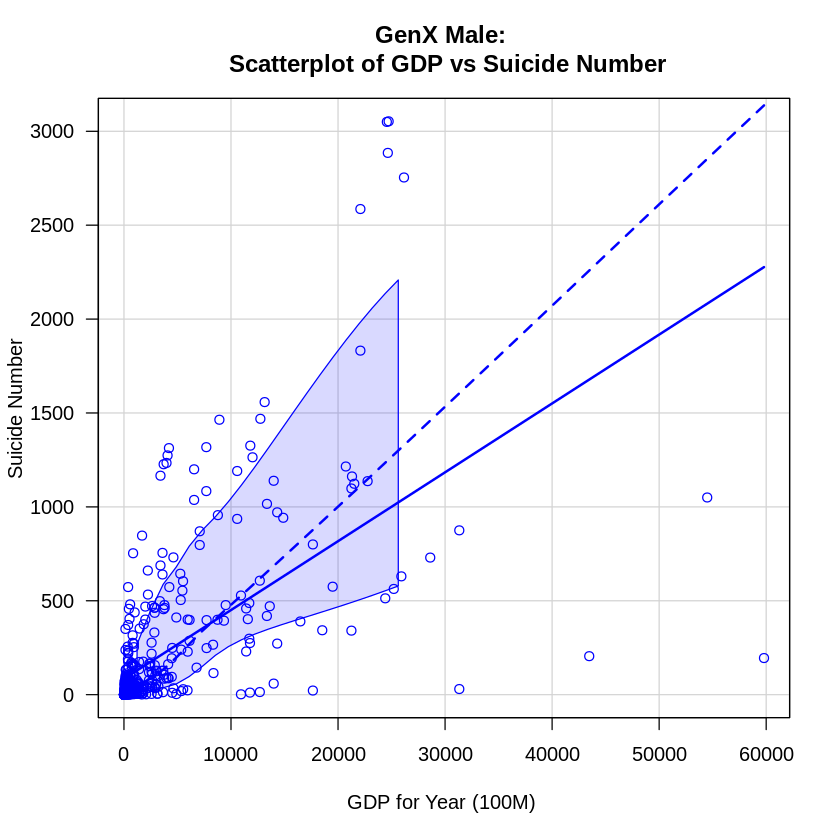


Call:
lm(formula = mgenx_suigdp$suicides.100k.pop ~ mgenx_suigdp$gdp_per_capita)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8510 -4.9682  0.0856  4.0423  8.8266 

Coefficients:
                              Estimate Std. Error t value             Pr(>|t|)
(Intercept)                 5.40048816 0.30695915   17.59 < 0.0000000000000002
mgenx_suigdp$gdp_per_capita 0.00006646 0.00001787    3.72             0.000222
                               
(Intercept)                 ***
mgenx_suigdp$gdp_per_capita ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.732 on 492 degrees of freedom
Multiple R-squared:  0.02736,	Adjusted R-squared:  0.02538 
F-statistic: 13.84 on 1 and 492 DF,  p-value: 0.0002223


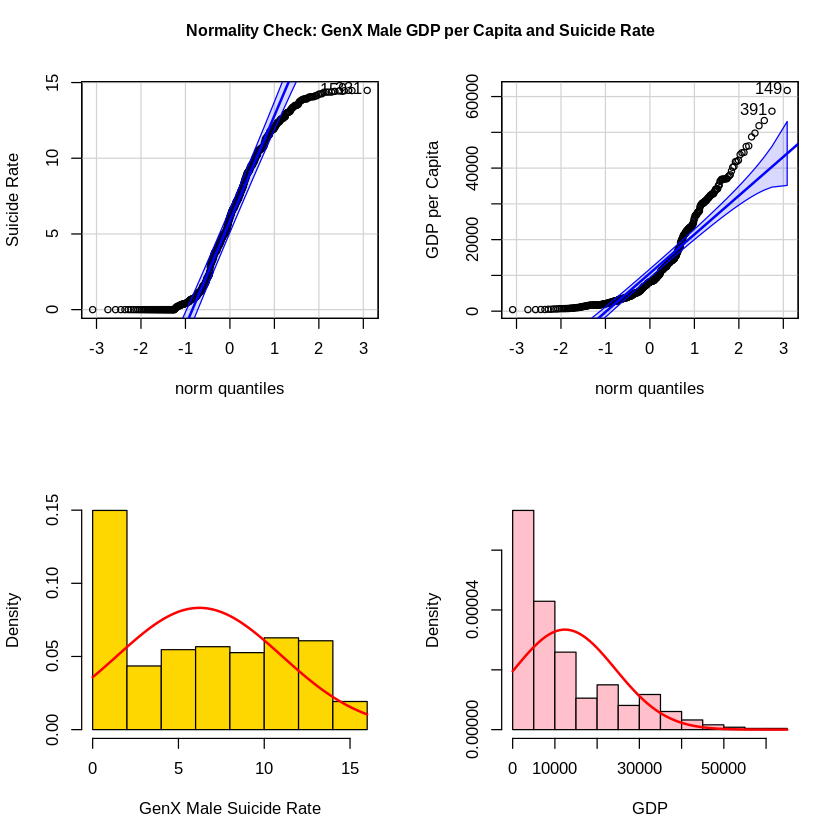

In [ ]:
#GenX Male: GDP per Capita vs Suicide rate

#Removing outliers
msui_out <- min(boxplot.stats(mgenx$suicides.100k.pop)$out)
mgenx_sui <- mgenx[mgenx$suicides.100k.pop <fsui_out, ]
mgdp_out <- min(boxplot.stats(mgenx_sui$gdp_per_capita)$out)

mgenx_suigdp <- mgenx_sui[mgenx_sui$gdp_per_capita < fgdp_out, ]

#Correlation
cor(mgenx_suigdp$suicides.100k.pop, mgenx_suigdp$gdp_per_capita)


#Scatterplot
scatterplot(mgenx_suigdp$gdp_for_year_100M, mgenx_suigdp$suicides_no, xlab = "GDP for Year (100M) ", ylab = "Suicide Number", las = 1, main = "GenX Male: \n Scatterplot of GDP vs Suicide Number", las =1, boxplots = FALSE)


#Normality Check
par(mfcol = c(2, 2))
qqPlot(mgenx_suigdp$suicides.100k.pop, ylab = "Suicide Rate")
hist(mgenx_suigdp$suicides.100k.pop, freq = F, main = "", col = "gold", xlab = "GenX Male Suicide Rate")
curve(dnorm(x, mean= mean(mgenx_suigdp$suicides.100k.pop), sd = sd(mgenx_suigdp$suicides.100k.pop)), col = "red", lwd =2, add = TRUE)
qqPlot(mgenx_suigdp$gdp_per_capita, ylab = "GDP per Capita")
hist(mgenx_suigdp$gdp_per_capita, freq = F, main = "", col = "pink", xlab = "GDP")
curve(dnorm(x, mean = mean(mgenx_suigdp$gdp_per_capita), sd = sd(mgenx_suigdp$gdp_per_capita)), col="red", lwd =2, add = TRUE)
mtext("Normality Check: GenX Male GDP per Capita and Suicide Rate", side = 3, line = -2, outer = TRUE, cex = 0.8, font = 2)


#Regression
mgenx.lm <- lm(mgenx_suigdp$suicides.100k.pop ~ mgenx_suigdp$gdp_per_capita)
summary(mgenx.lm)




`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


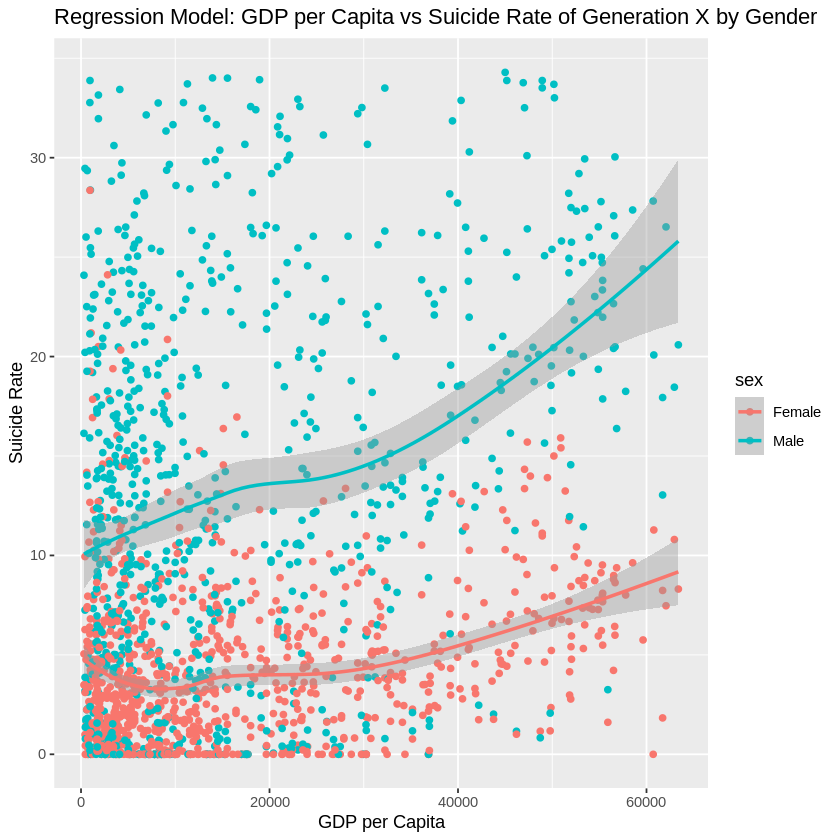

In [ ]:
#Visualization

#removing outliers from GenX
xsui_out <- min(boxplot.stats(GenX$suicides.100k.pop)$out)
x_sui <- GenX[GenX$suicides.100k.pop< xsui_out, ]
xgdp_out <- min(boxplot.stats(x_sui$gdp_per_capita)$out)
x_suigpd <- x_sui[x_sui$gdp_per_capita < xgdp_out, ]

#Visualization with ggplot2
regplot <- ggplot(data = x_suigpd, mapping = aes(x = gdp_per_capita, y = suicides.100k.pop)) + geom_point(mapping = aes(color = sex) ) +geom_smooth(mapping = aes(color = sex) )
print(regplot + ggtitle("Regression Model: GDP per Capita vs Suicide Rate of Generation X by Gender") + labs(y="Suicide Rate", x = "GDP per Capita"))




`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.


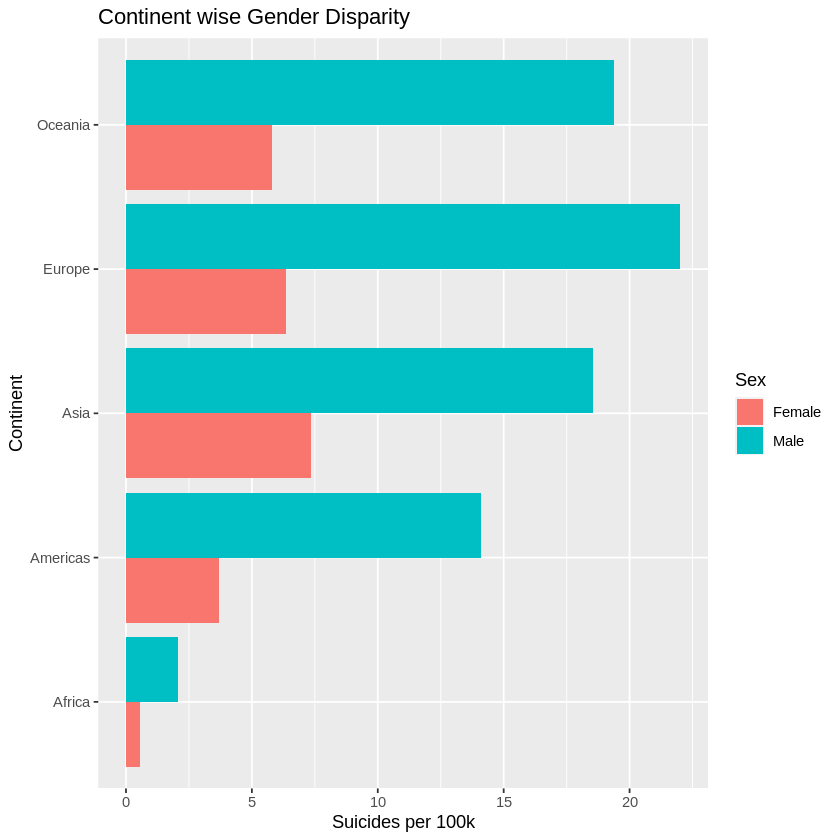

In [ ]:
# Visualizing the suicide rate per the continent
suicide_rate2 %>%
  group_by(continent, sex) %>%
  summarize(n = n(),
            suicides = sum(as.numeric(suicides_no)),
            population = sum(as.numeric(population)),
            suicide_per_100k = (suicides / population) * 100000) %>%
  ggplot(aes(x = continent, y = suicide_per_100k, fill = sex)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Continent wise Gender Disparity",
       x = "Continent",
       y = "Suicides per 100k",
       fill = "Sex") +
  coord_flip()

In [ ]:
# Filtering and preparing data for Europe continent
df <- suicide_rate2 %>% group_by(country, year) %>% filter(continent == "Europe") %>%
  summarise(
    avg_suicide_rate = mean(suicides.100k.pop),
    hdi = HDI.for.year,
    gdp_per_capita
  )
df_unq <- unique(df)



Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'country', 'year'. You can override using
the `.groups` argument.


[1] -0.289673


	Pearson's product-moment correlation

data:  df_unq$hdi and df_unq$avg_suicide_rate
t = -5.2245, df = 298, p-value = 0.0000003286
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3901169 -0.1824160
sample estimates:
      cor 
-0.289673 


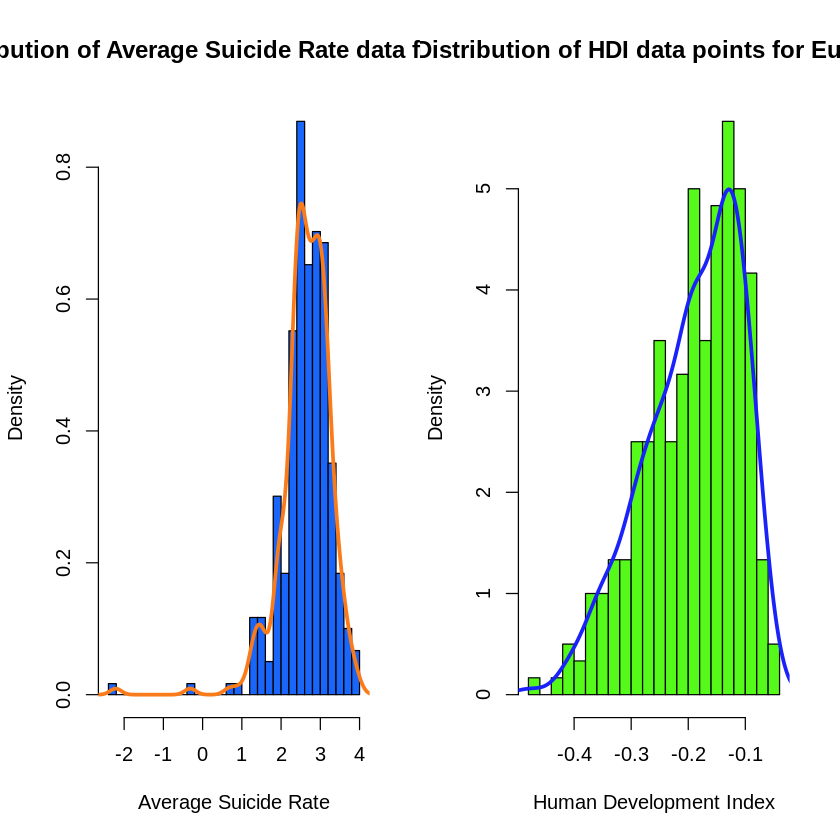

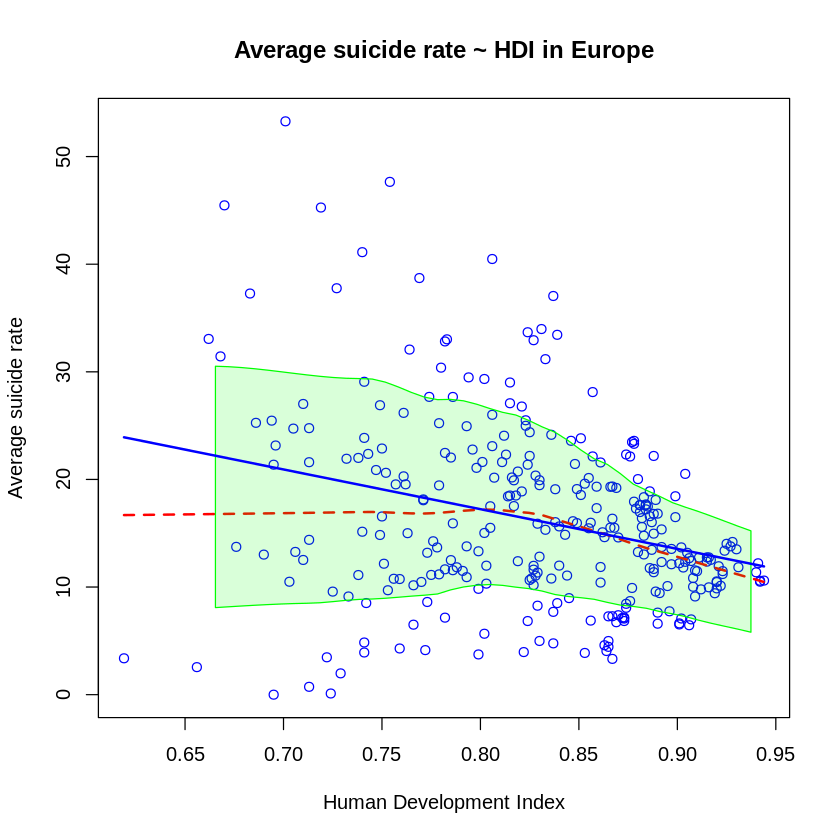

In [ ]:
# Normality check for average suicide Rate
par(mfcol = c(1,2))
hist(log(df_unq$avg_suicide_rate), breaks = 30, freq = F, col = "#1A65FA",
     xlab = "Average Suicide Rate", ylab = "Density", main = "Distribution of Average Suicide Rate data for Europe")
lines(density(log(df_unq$avg_suicide_rate)), lwd = 3, col = "#FA7B1A")

# Normality check for HDI
hist(log(df_unq$hdi), breaks = 30, freq = F, col = "#56FA1A",
     xlab = "Human Development Index", ylab = "Density", main = "Distribution of HDI data points for Europe")
lines(density(log(df_unq$hdi)), lwd = 3, col = "#1A22FA")

# Correlation of Average_suicide_rate ~ HDI
cor(df_unq$hdi, df_unq$avg_suicide_rate)

cor.test(df_unq$hdi, df_unq$avg_suicide_rate)


scatterplot(df_unq$hdi,df_unq$avg_suicide_rate,
            grid = F,
            boxplots = F,
            smooth = list(col.smooth = "red",
                          col.spread = "green"),
            ylab = "Average suicide rate",
            main = "Average suicide rate ~ HDI in Europe",
            xlab = "Human Development Index",
)

In [ ]:
# Checking for regression
lin_reg <- lm(df_unq$avg_suicide_rate ~ df_unq$hdi, data = df_unq)
summary(lin_reg)


Call:
lm(formula = df_unq$avg_suicide_rate ~ df_unq$hdi, data = df_unq)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.110  -5.759  -0.186   4.185  32.387 

Coefficients:
            Estimate Std. Error t value           Pr(>|t|)    
(Intercept)   46.768      5.869   7.969 0.0000000000000343 ***
df_unq$hdi   -36.918      7.066  -5.225 0.0000003286456131 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.255 on 298 degrees of freedom
Multiple R-squared:  0.08391,	Adjusted R-squared:  0.08084 
F-statistic:  27.3 on 1 and 298 DF,  p-value: 0.0000003286
